In [1]:
import time
import json
import numpy as np
import pandas as pd
from pandas import json_normalize
import matplotlib.pyplot as plt
import json
import ast
import scipy.stats as stats
import stanza
import math
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
# import SVC classifier
from sklearn.svm import SVC
# import metrics to compute accuracy
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [2]:
final_df = pd.read_csv('./finalwithDate.csv')

In [4]:
# final_df = final_df.drop(['Unnamed: 0','reason', 'trafficSource.keyword', 'hits'], axis = 1)
final_df

,Unnamed: 0,date,device.deviceCategory,geoNetwork.country,totals.hits,totals.pageviews,totals.timeOnSite,trafficSource.keyword,hits,NLPValue,isAnomaly,reason
0,0,20180501,desktop,United States,10,9.0,416.0,NaN,"[{'hitNumber': '14', 'time': '0', 'hour': '0',...",1.0,0.0,NaN
1,1,20180501,mobile,United States,1,1.0,0.0,(not set),"[{'hitNumber': '1', 'time': '0', 'hour': '0', ...",1.0,0.0,NaN
2,2,20180501,desktop,India,1,1.0,0.0,(not set),"[{'hitNumber': '1', 'time': '0', 'hour': '0', ...",1.0,0.0,NaN
3,3,20180501,desktop,United States,53,34.0,682.0,NaN,"[{'hitNumber': '1', 'time': '0', 'hour': '0', ...",1.0,0.0,NaN
4,4,20180501,mobile,Nigeria,1,1.0,0.0,(not set),"[{'hitNumber': '2', 'time': '0', 'hour': '0', ...",1.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
401584,401584,20181015,desktop,South Korea,5,4.0,45.0,(not set),"[{'hitNumber': '1', 'time': '0', 'hour': '23',...",1.0,0.0,NaN
401585,401585,20181015,desktop,India,7,7.0,266.0,(not set),"[{'hitNumber': '1', 'time': '0', 'hour': '23',...",1.0,0.0,NaN
401586,401586,20181015,desktop,United States,5,5.0,39.0,NaN,"[{'hitNumber': '1', 'time': '0', 'hour': '23',...",1.0,0.0,NaN
401587,401587,20181015,desktop,Taiwan,6,4.0,157.0,(not provided),"[{'hitNumber': '1', 'time': '0', 'hour': '23',...",1.0,0.0,NaN


In [5]:
final_df['norm_country'] = pd.factorize(final_df['geoNetwork.country'])[0]

In [6]:
final_df['isAnomaly'].fillna(value = 0, inplace = True)
aomalousSessions = final_df[final_df['isAnomaly'] == 1]
len(aomalousSessions)

966

In [7]:
final_df['isAnomaly'].fillna(value = 0, inplace = True)
nonAomalousSessions = final_df[final_df['isAnomaly'] == 0]
nonAomalousSessions

,Unnamed: 0,date,device.deviceCategory,geoNetwork.country,totals.hits,totals.pageviews,totals.timeOnSite,trafficSource.keyword,hits,NLPValue,isAnomaly,reason,norm_country
0,0,20180501,desktop,United States,10,9.0,416.0,NaN,"[{'hitNumber': '14', 'time': '0', 'hour': '0',...",1.0,0.0,NaN,0
1,1,20180501,mobile,United States,1,1.0,0.0,(not set),"[{'hitNumber': '1', 'time': '0', 'hour': '0', ...",1.0,0.0,NaN,0
2,2,20180501,desktop,India,1,1.0,0.0,(not set),"[{'hitNumber': '1', 'time': '0', 'hour': '0', ...",1.0,0.0,NaN,1
3,3,20180501,desktop,United States,53,34.0,682.0,NaN,"[{'hitNumber': '1', 'time': '0', 'hour': '0', ...",1.0,0.0,NaN,0
4,4,20180501,mobile,Nigeria,1,1.0,0.0,(not set),"[{'hitNumber': '2', 'time': '0', 'hour': '0', ...",1.0,0.0,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
401584,401584,20181015,desktop,South Korea,5,4.0,45.0,(not set),"[{'hitNumber': '1', 'time': '0', 'hour': '23',...",1.0,0.0,NaN,17
401585,401585,20181015,desktop,India,7,7.0,266.0,(not set),"[{'hitNumber': '1', 'time': '0', 'hour': '23',...",1.0,0.0,NaN,1
401586,401586,20181015,desktop,United States,5,5.0,39.0,NaN,"[{'hitNumber': '1', 'time': '0', 'hour': '23',...",1.0,0.0,NaN,0
401587,401587,20181015,desktop,Taiwan,6,4.0,157.0,(not provided),"[{'hitNumber': '1', 'time': '0', 'hour': '23',...",1.0,0.0,NaN,8


In [8]:
sampled_anomaly_train = aomalousSessions.sample(frac =.50)
sampled_anomaly_test = pd.concat([aomalousSessions, sampled_anomaly_train, sampled_anomaly_train]).drop_duplicates(keep=False)
sampled_anomaly_train

,Unnamed: 0,date,device.deviceCategory,geoNetwork.country,totals.hits,totals.pageviews,totals.timeOnSite,trafficSource.keyword,hits,NLPValue,isAnomaly,reason,norm_country
131666,131666,20180618,desktop,Lithuania,16,11.0,143.0,(not provided),"[{'hitNumber': '1', 'time': '0', 'hour': '11',...",1.0,1.0,total hits of a session from NON Opearting/rar...,71
297931,297931,20180831,desktop,Azerbaijan,82,55.0,1810.0,(not set),"[{'hitNumber': '1', 'time': '0', 'hour': '12',...",1.0,1.0,total pageViews from a session is outlier from...,68
55703,55703,20180520,tablet,Jersey,17,15.0,150.0,(not provided),"[{'hitNumber': '1', 'time': '0', 'hour': '13',...",1.0,1.0,total pageViews from a session is outlier from...,105
7075,7075,20180503,desktop,United States,50,33.0,1778.0,NaN,"[{'hitNumber': '1', 'time': '0', 'hour': '9', ...",1.0,1.0,user generating unusual higher volume of traff...,0
56898,56898,20180521,desktop,China,25,18.0,255.0,(not provided),"[{'hitNumber': '1', 'time': '0', 'hour': '4', ...",1.0,1.0,total pageViews from a session is outlier from...,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
102054,102054,20180606,desktop,United States,39,25.0,1409.0,NaN,"[{'hitNumber': '1', 'time': '0', 'hour': '10',...",1.0,1.0,user generating unusual higher volume of traff...,0
347382,347382,20180923,desktop,United States,186,115.0,3074.0,NaN,"[{'hitNumber': '1', 'time': '0', 'hour': '14',...",1.0,1.0,total pageViews from a session is absurdly hig...,0
21361,21361,20180508,desktop,United States,30,21.0,490.0,NaN,"[{'hitNumber': '1', 'time': '0', 'hour': '14',...",1.0,1.0,user generating unusual higher volume of traff...,0
88792,88792,20180601,desktop,United States,59,43.0,1937.0,NaN,"[{'hitNumber': '1', 'time': '0', 'hour': '15',...",1.0,1.0,user generating unusual higher volume of traff...,0


In [9]:
sampled_nonAnomaly_train = nonAomalousSessions.sample(frac =.10)
sampled_nonAnomaly_test = pd.concat([nonAomalousSessions, sampled_nonAnomaly_train]).drop_duplicates(keep=False)
sampled_nonAnomaly_test

,Unnamed: 0,date,device.deviceCategory,geoNetwork.country,totals.hits,totals.pageviews,totals.timeOnSite,trafficSource.keyword,hits,NLPValue,isAnomaly,reason,norm_country
0,0,20180501,desktop,United States,10,9.0,416.0,NaN,"[{'hitNumber': '14', 'time': '0', 'hour': '0',...",1.0,0.0,NaN,0
1,1,20180501,mobile,United States,1,1.0,0.0,(not set),"[{'hitNumber': '1', 'time': '0', 'hour': '0', ...",1.0,0.0,NaN,0
2,2,20180501,desktop,India,1,1.0,0.0,(not set),"[{'hitNumber': '1', 'time': '0', 'hour': '0', ...",1.0,0.0,NaN,1
3,3,20180501,desktop,United States,53,34.0,682.0,NaN,"[{'hitNumber': '1', 'time': '0', 'hour': '0', ...",1.0,0.0,NaN,0
5,5,20180501,desktop,United States,3,3.0,14.0,NaN,"[{'hitNumber': '1', 'time': '0', 'hour': '0', ...",1.0,0.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
401583,401583,20181015,mobile,Belgium,1,1.0,0.0,(not provided),"[{'hitNumber': '1', 'time': '0', 'hour': '23',...",1.0,0.0,NaN,21
401584,401584,20181015,desktop,South Korea,5,4.0,45.0,(not set),"[{'hitNumber': '1', 'time': '0', 'hour': '23',...",1.0,0.0,NaN,17
401586,401586,20181015,desktop,United States,5,5.0,39.0,NaN,"[{'hitNumber': '1', 'time': '0', 'hour': '23',...",1.0,0.0,NaN,0
401587,401587,20181015,desktop,Taiwan,6,4.0,157.0,(not provided),"[{'hitNumber': '1', 'time': '0', 'hour': '23',...",1.0,0.0,NaN,8


In [10]:
train_data = pd.concat([sampled_anomaly_train, sampled_nonAnomaly_train])
train_data

,Unnamed: 0,date,device.deviceCategory,geoNetwork.country,totals.hits,totals.pageviews,totals.timeOnSite,trafficSource.keyword,hits,NLPValue,isAnomaly,reason,norm_country
131666,131666,20180618,desktop,Lithuania,16,11.0,143.0,(not provided),"[{'hitNumber': '1', 'time': '0', 'hour': '11',...",1.0,1.0,total hits of a session from NON Opearting/rar...,71
297931,297931,20180831,desktop,Azerbaijan,82,55.0,1810.0,(not set),"[{'hitNumber': '1', 'time': '0', 'hour': '12',...",1.0,1.0,total pageViews from a session is outlier from...,68
55703,55703,20180520,tablet,Jersey,17,15.0,150.0,(not provided),"[{'hitNumber': '1', 'time': '0', 'hour': '13',...",1.0,1.0,total pageViews from a session is outlier from...,105
7075,7075,20180503,desktop,United States,50,33.0,1778.0,NaN,"[{'hitNumber': '1', 'time': '0', 'hour': '9', ...",1.0,1.0,user generating unusual higher volume of traff...,0
56898,56898,20180521,desktop,China,25,18.0,255.0,(not provided),"[{'hitNumber': '1', 'time': '0', 'hour': '4', ...",1.0,1.0,total pageViews from a session is outlier from...,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
261485,261485,20180814,mobile,United States,2,2.0,323.0,Google Water Bottles,"[{'hitNumber': '1', 'time': '0', 'hour': '16',...",1.0,0.0,NaN,0
71469,71469,20180525,desktop,United States,6,5.0,88.0,(not set),"[{'hitNumber': '1', 'time': '0', 'hour': '16',...",1.0,0.0,NaN,0
230598,230598,20180801,desktop,United States,1,1.0,0.0,(not set),"[{'hitNumber': '1', 'time': '0', 'hour': '4', ...",1.0,0.0,NaN,0
280459,280459,20180823,desktop,United Kingdom,1,1.0,0.0,(not set),"[{'hitNumber': '1', 'time': '0', 'hour': '11',...",1.0,0.0,NaN,4


In [11]:
test_data = pd.concat([sampled_nonAnomaly_test, sampled_anomaly_test])

In [12]:
test_data.to_csv('./testData.csv')

0.0    40062
1.0      483
Name: isAnomaly, dtype: int64

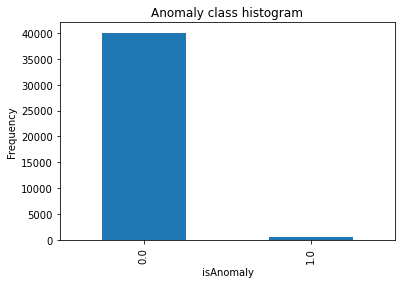

In [13]:
#SMOTE Application
pd.value_counts(train_data['isAnomaly']).plot.bar()
plt.title('Anomaly class histogram')
plt.xlabel('isAnomaly')
plt.ylabel('Frequency')
train_data['isAnomaly'].value_counts()



In [14]:
X_train = train_data.drop(['isAnomaly', 'Unnamed: 0', 'device.deviceCategory', 'date', 'geoNetwork.country', 'trafficSource.keyword', 'hits', 'reason'], axis=1)
y_train = train_data['isAnomaly']

In [15]:
X_test = test_data.drop(['isAnomaly', 'Unnamed: 0', 'device.deviceCategory', 'date', 'geoNetwork.country', 'trafficSource.keyword', 'hits', 'reason'], axis=1)
y_test = test_data['isAnomaly']
y_test

0         0.0
1         0.0
2         0.0
3         0.0
5         0.0
         ... 
393487    1.0
397918    1.0
399602    1.0
400478    1.0
401557    1.0
Name: isAnomaly, Length: 361044, dtype: float64

In [16]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

After OverSampling, the shape of train_X: (80124, 5)
After OverSampling, the shape of train_y: (80124,) 

After OverSampling, counts of label '1': 40062
After OverSampling, counts of label '0': 40062


In [17]:
# instantiate classifier with default hyperparameters
svc=SVC() 


# fit classifier to training set
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.9986


In [18]:
import pickle
from joblib import Parallel, delayed
import joblib
joblib.dump(svc, 'svm.pkl')

['svm.pkl']

In [19]:
print('Training set score: {:.4f}'.format(svc.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(svc.score(X_test, y_test)))

Training set score: 0.9886
Test set score: 0.9986


In [20]:
# clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(svc, X_train, y_train, cv=5)
# print("%0.2f accuracy with a standard deviation of %0.4f" % (scores.mean(), scores.std()))
scores

array([0.98791466, 0.98828462, 0.98828462, 0.98840794, 0.98853126])

In [21]:
#Logistic Regression Starts
logreg = LogisticRegression(solver='liblinear', random_state=0)
logreg.fit(X_train, y_train)
y_pred_test = logreg.predict(X_test)

In [22]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.9972


In [23]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier



# instantiate the classifier 

rfc = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model

rfc.fit(X_train, y_train)



# Predict the Test set results

y_pred = rfc.predict(X_test)

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9979
